In [101]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

Все 3 варианта функции, по-разному получающие ответ

In [102]:
def vectorised(vector):
    """Find positions of items placed after zeros, check if it went out of limits, then just return maximal"""
    target = np.where(vector == 0)[0] + 1
    target = target[np.where(target < len(vector))]
    if not target.shape[0]:
        return None
    
    return vector[target].max()
    
    
def semi_vectorised(vector):
    """General idea: get diff array and then check if item didn't change with the diff"""
    target = vector[1:] - vector[:-1]
    variants = []
    for i in range(len(vector) - 1):
        if vector[i + 1] == target[i]:
            variants.append(target[i])
    
    if len(variants) == 0:
        return None
    
    return max(variants)


def non_vectorised(vector):
    """It'd work with list instead of np.ndarray vector"""
    item = 0
    target = []
    while item < len(vector):
        if vector[item] == 0:
            item += 1
            if item < len(vector):
                target.append(vector[item])
        
        else:
            item += 1
        
    if len(target) == 0:
        return None
    
    max = target[0]
    for item in target:
        if item > max:
            max = item
            
    return max

Сделаем набор длин тестов + количество нулей для этого теста (длины будут от 10 до ~4000, число нулей - не больше фиксированного случайного числа)

In [103]:
np.random.seed(317)
lengths = np.arange(4000) + 10 
zeros_amount = (np.random.rand(4000) * lengths).astype(int)
zeros_amount

array([   3,    7,   11, ...,   18, 1783, 1712])

Создаем тест необходимой длины, цифры будут от 1 до 50000, нули будут на случайных позициях, запишем время выполнения для каждого теста

In [110]:
times_saver = np.empty((4000, 3))
np.random.seed(317)
for i in range(4000):
    random_vector = (np.random.rand(lengths[i]) * 50000).astype(int)
    zeros_positions = (np.random.rand(zeros_amount[i]) * lengths[i]).astype(int)
    random_vector[zeros_positions] = 0
    
    time_1 = time.time()
    vectorised(random_vector)
    time_vectorised = time.time() - time_1
    
    time_2 = time.time()
    semi_vectorised(random_vector)
    time_semi_vectorised = time.time() - time_2
    
    random_list = random_vector.tolist()
    
    time_3 = time.time()
    non_vectorised(random_list)
    time_non_vectorised = time.time() - time_3
        
    times_saver[i] = time_vectorised, time_semi_vectorised, time_non_vectorised

In [111]:
times_saver *= 1000000
times_saver

array([[  45.06111145,   15.73562622,    5.7220459 ],
       [  26.94129944,   14.06669617,    4.76837158],
       [  23.12660217,   12.63618469,    5.00679016],
       ...,
       [  15.9740448 , 1101.01699829,  569.82040405],
       [  32.90176392, 1391.88766479,  853.06167603],
       [  31.9480896 , 1385.92720032,  843.0480957 ]])

Отобразим все графики по отдельности. <br>
Зеленый - векторизованная функция <br>Желтый - частично векторизованная <br>Красный - не векторизованная.

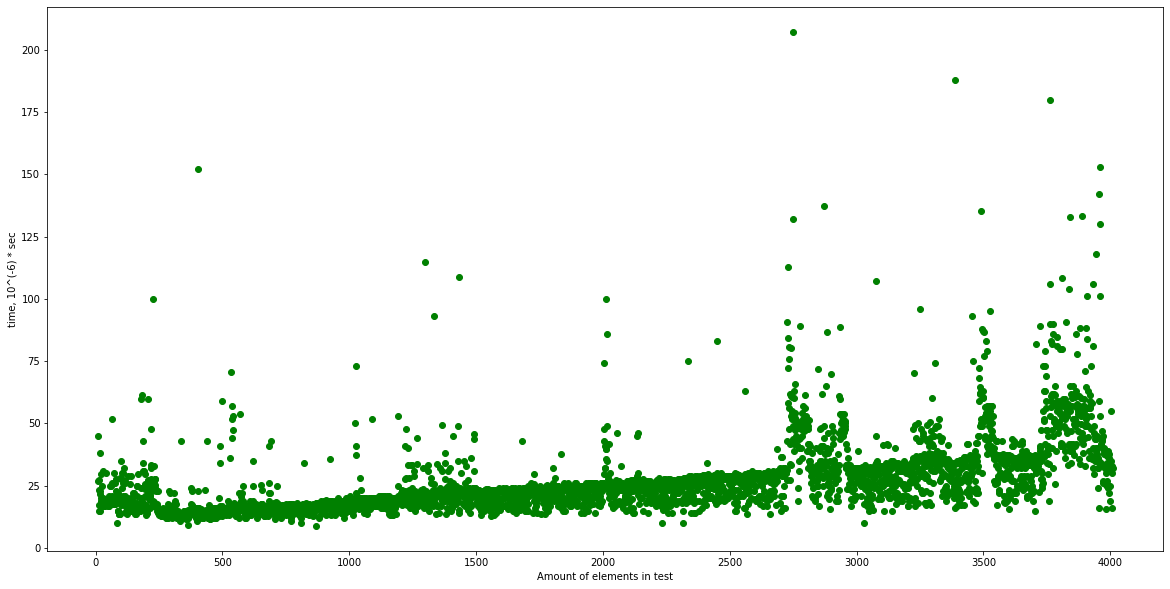

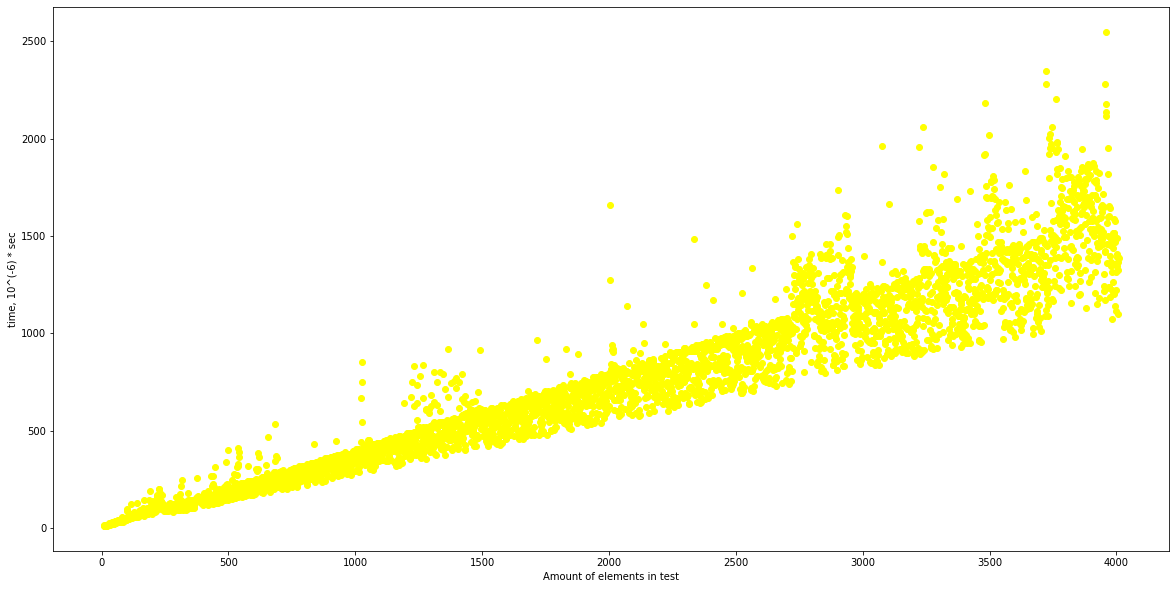

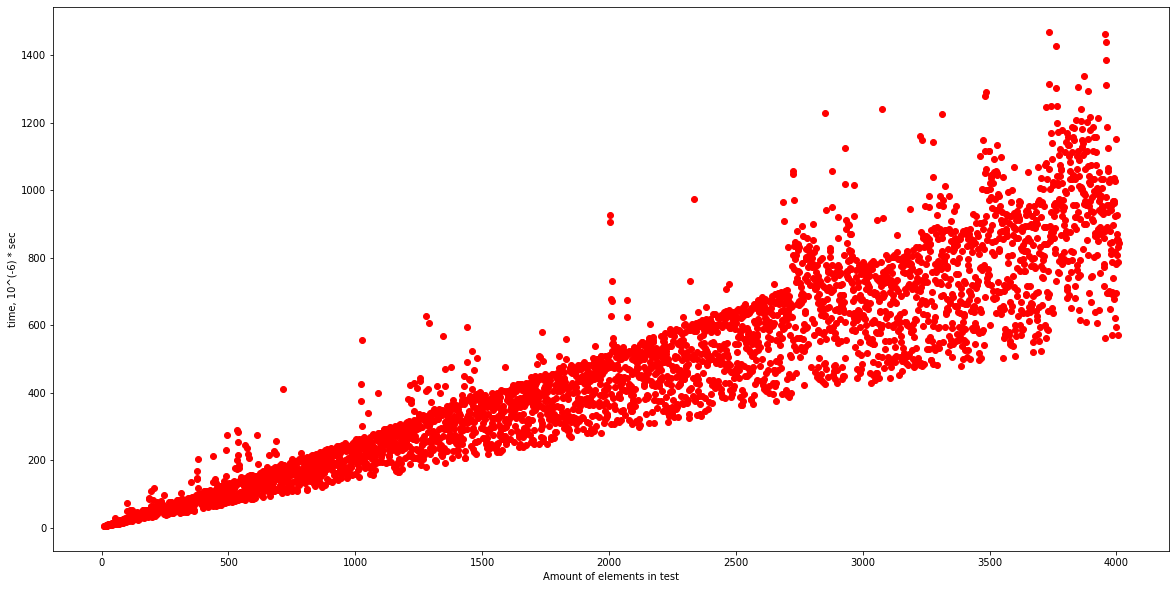

In [112]:
figure = plt.figure(figsize=(20, 10))
asp = figure.add_subplot()
asp.set_xlabel('Amount of elements in test')
asp.set_ylabel('time, 10^(-6) * sec')
asp.scatter(np.arange(4000) + 10, times_saver.T[0], color='green')
plt.show()

figure = plt.figure(figsize=(20, 10))
bsp = figure.add_subplot()
bsp.set_xlabel('Amount of elements in test')
bsp.set_ylabel('time, 10^(-6) * sec')
plt.scatter(np.arange(4000) + 10, times_saver.T[1], color='yellow')
plt.show()

figure = plt.figure(figsize=(20, 10))
csp = figure.add_subplot()
csp.set_xlabel('Amount of elements in test')
csp.set_ylabel('time, 10^(-6) * sec')
plt.scatter(np.arange(4000) + 10, times_saver.T[2], color='red')
plt.show()

По графикам пока что видно, что векторизованная версия проявляет себя тем лучше, чем больше число элементов, и наоборот - на минимальном числе элементов не векторизованная функция проявляет себя лучше аналогов. <br>
Но при увеличении числа элементов у частично и не векоризованных версий функции наблюдается более высокая скорость линейного роста времени выполнения относительно векторизованной <br>
При этом, векторизованная функция относительно своих же результатов справляется с выбросами гораздо хуже не векторизованных (рост времени выполнения в 10-20 раз относительно 2-3 раз у не\частично векторизованных)

Рассмотрим начало графиков с минимальной длиной тестов, чтобы проверить гипотезу о большей эффективностей не векторизованных функций на малом наборе

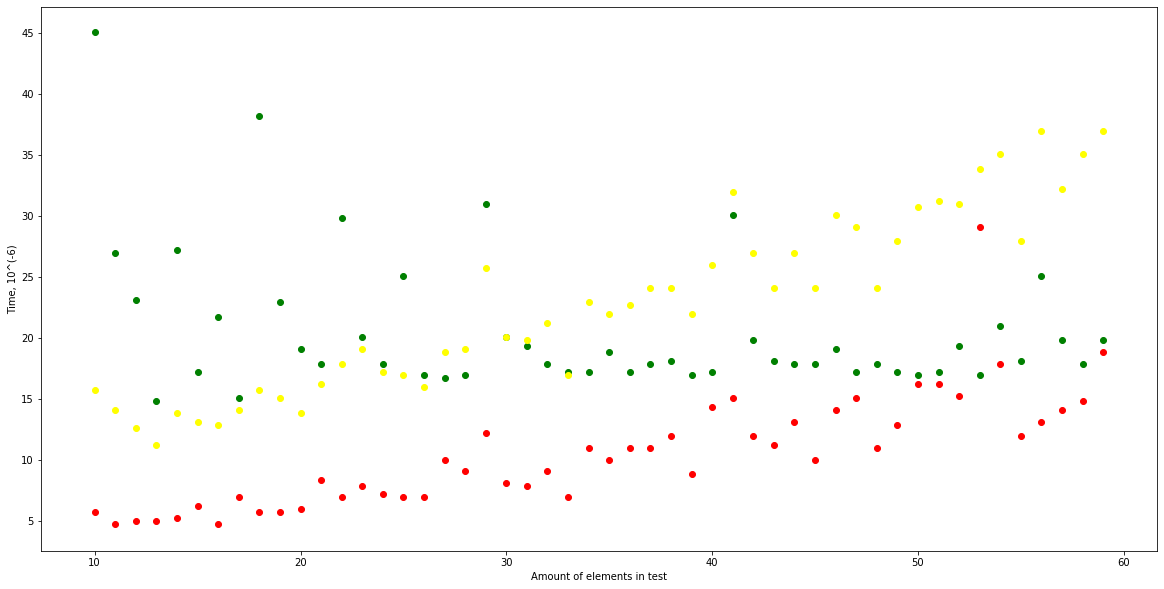

In [113]:
figure = plt.figure(figsize=(20,10))
subplot = figure.add_subplot()

subplot.set_xlabel("Amount of elements in test")
subplot.set_ylabel("Time, 10^(-6)")
plt.scatter(np.arange(50) + 10, times_saver.T[0,:50], color='green')
plt.scatter(np.arange(50) + 10, times_saver.T[1,:50], color='yellow')
plt.scatter(np.arange(50) + 10, times_saver.T[2,:50], color='red')
plt.show()

На графике видно, что: <br>
1) Не векторизованная функция - эффективнее всех на минимальном числе элементов <br>
2) И не векторизованная, и частично векторизованная функции растут по некому линейному закону, при этом скорость роста не векторизованной функции выше <br>
3) Векторизованная функция становится достаточно эффективной лишь при числе элементов больше 50

Рассмотрим скорости функций на большем числе элементов, например, 3100-3200

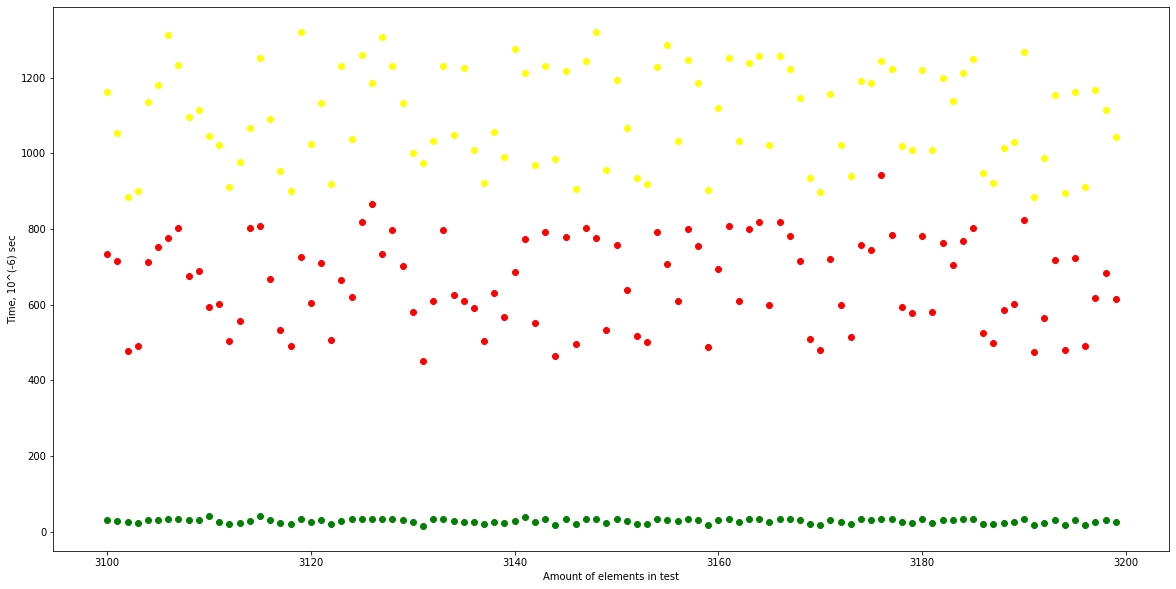

In [114]:
figure = plt.figure(figsize=(20,10))
subplot = figure.add_subplot()

subplot.set_xlabel("Amount of elements in test")
subplot.set_ylabel("Time, 10^(-6) sec")
plt.scatter(np.arange(100) + 3100, times_saver.T[0,3100:3200], color='green')
plt.scatter(np.arange(100) + 3100, times_saver.T[1,3100:3200], color='yellow')
plt.scatter(np.arange(100) + 3100, times_saver.T[2,3100:3200], color='red')
plt.show()

Данный график подтверждает ранние предположения: <br>
1) Векторизованная функция имеет наименьшую скорость роста от числа элементов <br>
2) Частичная векторизация и не векторизованный вариант выполняются в разы медленнее не векторизованной <br>


Посмотрим, во сколько раз отличаются скорости: не векторизованной и векторизованной на большом числе элементов и малом:

In [115]:
times_saver[3120, 2] / times_saver[3120, 0], times_saver[1, 2] / times_saver[1, 0]

(22.469026548672566, 0.17699115044247787)

И во сколько раз отличаются аналогичные скорости у частично векторизованной и векторизованной:

In [116]:
times_saver[3120, 1] / times_saver[3120, 0], times_saver[1, 1] / times_saver[1, 0]

(38.04424778761062, 0.5221238938053098)

И, наконец, рассмотрим точку с нетипичными данными (для удобства, также возьмем несколько соседних)

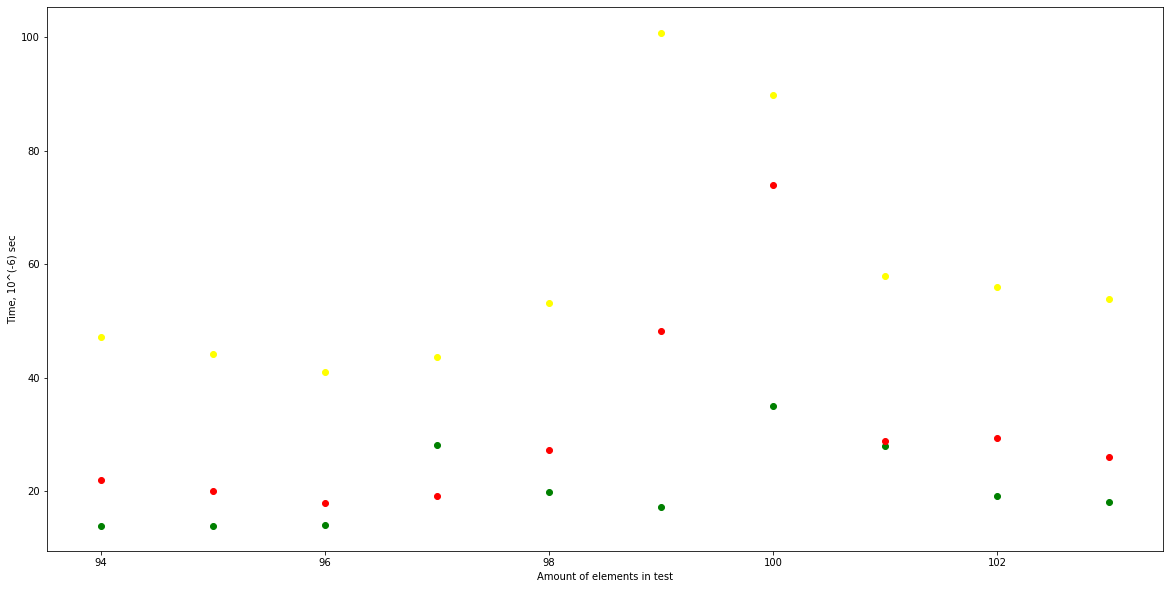

In [117]:
figure = plt.figure(figsize=(20,10))
subplot = figure.add_subplot()

subplot.set_xlabel("Amount of elements in test")
subplot.set_ylabel("Time, 10^(-6) sec")
plt.scatter(np.arange(10) + 94, times_saver.T[0,84:94], color='green')
plt.scatter(np.arange(10) + 94, times_saver.T[1,84:94], color='yellow')
plt.scatter(np.arange(10) + 94, times_saver.T[2,84:94], color='red')
plt.show()

Можно заметить, что на 97 точках есть нетипичный результат, когда векторизованная функция работает намного хуже ожидаемого, а не векторизованная - наоборот, лучше <br>
Посмотрим, чем выделяются эти данные:

In [118]:
lengths[87], zeros_amount[87]

(97, 5)

На данном наборе достаточно малый процент "нулей" относительно остальных <br>
Функция, использующая циклы работает быстрее, т.к. у неё получается меньшее число выполнений дополнения вероятного варианта ответов + меньше цикл по списку вариантов ответов <br>
Функция, использующая векторизацию, почему-то на подобных наборах работает медленнее, и я не знаю, чем это обосновать...

На основе вышесказанного, можно сделать выводы: <br>
1) Для минимального числа элементов оптимальным решением будет использование циклов и списков, не применяя преймущества numpy <br>
но, когда количество элементов достигает хотя бы 50-70, numpy-методы предпочтительны <br>
2) При увеличении числа элементов рост времени выполнения средствами numpy минимален <br>
3) Векторизованная функция справляется с выбросами (нетипичными входными данными) хуже аналогов <br>
При этом этими нетипичными данными, на удивление, является малый процент нулей в тесте <br>
4) Частично-векторизованная функция показывает худший в среднем результат, использование таких функций не оправдано ничем, кроме недостаточных знаний студента (она хуже не векторизованной версии на любом числе элементов, при этом имеет минимальное преймущество относительно векторизованной на малом числе элементов)